In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_emp_pre = pd.read_csv('../../Data/Downloaded_Old/pre_emp.csv')
df_emp_post = pd.read_csv('../../Data/Downloaded_Old/post_emp.csv')

In [3]:
df_emp_pre['tot_emp'] = df_emp_pre['prm_emp'] + df_emp_pre['non_prm_emp']
df_emp_post['tot_emp'] = df_emp_post['prm_emp'] + df_emp_post['non_prm_emp']

In [4]:
df_emp_pre['prm_emp_shr'] = df_emp_pre['prm_emp'] / df_emp_pre['tot_emp']
df_emp_pre['non_prm_emp_shr'] = df_emp_pre['non_prm_emp'] / df_emp_pre['tot_emp']

In [5]:
df_emp_post['prm_emp_shr'] = df_emp_post['prm_emp'] / df_emp_post['tot_emp']
df_emp_post['non_prm_emp_shr'] = df_emp_post['non_prm_emp'] / df_emp_post['tot_emp']

In [6]:
df_emp_pre_picked = df_emp_pre[['year_wst', 'prm_emp', 'non_prm_emp', 'prm_emp_shr', 'non_prm_emp_shr']]

In [7]:
df_emp_post_picked = df_emp_post[['year_wst', 'prm_emp', 'non_prm_emp', 'prm_emp_shr', 'non_prm_emp_shr']]

In [8]:
# adjust unit to persons 
adj_unit_post = 10000

In [9]:
df_emp_post_picked['prm_emp'] = df_emp_post_picked['prm_emp'] * adj_unit_post
df_emp_post_picked['non_prm_emp'] = df_emp_post_picked['non_prm_emp'] * adj_unit_post

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_84097/3484030429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_post_picked['prm_emp'] = df_emp_post_picked['prm_emp'] * adj_unit_post
/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_84097/3484030429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_post_picked['non_prm_emp'] = df_emp_post_picked['non_prm_emp'] * adj_unit_post


In [10]:
df_merged = pd.concat([df_emp_pre_picked, df_emp_post_picked])

In [11]:
# convert unit to million people
adj_unit_mil = 1e6

In [12]:
df_merged['prm_emp_mil'] = df_merged['prm_emp'] / adj_unit_mil
df_merged['non_prm_emp_mil'] = df_merged['non_prm_emp'] / adj_unit_mil

In [13]:
df_merged

,year_wst,prm_emp,non_prm_emp,prm_emp_shr,non_prm_emp_shr,prm_emp_mil,non_prm_emp_mil
0,1906,15394100,9287400,0.623710,0.376290,15.3941,9.2874
1,1907,15447500,9475600,0.619807,0.380193,15.4475,9.4756
2,1908,15381000,9621100,0.615188,0.384812,15.3810,9.6211
3,1909,15287700,9768600,0.610134,0.389866,15.2877,9.7686
4,1910,15307700,9825800,0.609056,0.390944,15.3077,9.8258
...,...,...,...,...,...,...,...
45,1998,3430000,59180000,0.054784,0.945216,3.4300,59.1800
46,1999,3350000,58720000,0.053971,0.946029,3.3500,58.7200
47,2000,3260000,58680000,0.052632,0.947368,3.2600,58.6800
48,2001,3130000,58430000,0.050845,0.949155,3.1300,58.4300


In [14]:
df_merged['tot_emp_mil'] = df_merged['prm_emp_mil'] + df_merged['non_prm_emp_mil']

In [15]:
df_merged['prm_emp_shr'] = df_merged['prm_emp_mil'] / df_merged['tot_emp_mil']
df_merged['non_prm_emp_shr'] = df_merged['non_prm_emp_mil'] / df_merged['tot_emp_mil']

In [16]:
df_merged

,year_wst,prm_emp,non_prm_emp,prm_emp_shr,non_prm_emp_shr,prm_emp_mil,non_prm_emp_mil,tot_emp_mil
0,1906,15394100,9287400,0.623710,0.376290,15.3941,9.2874,24.6815
1,1907,15447500,9475600,0.619807,0.380193,15.4475,9.4756,24.9231
2,1908,15381000,9621100,0.615188,0.384812,15.3810,9.6211,25.0021
3,1909,15287700,9768600,0.610134,0.389866,15.2877,9.7686,25.0563
4,1910,15307700,9825800,0.609056,0.390944,15.3077,9.8258,25.1335
...,...,...,...,...,...,...,...,...
45,1998,3430000,59180000,0.054784,0.945216,3.4300,59.1800,62.6100
46,1999,3350000,58720000,0.053971,0.946029,3.3500,58.7200,62.0700
47,2000,3260000,58680000,0.052632,0.947368,3.2600,58.6800,61.9400
48,2001,3130000,58430000,0.050845,0.949155,3.1300,58.4300,61.5600


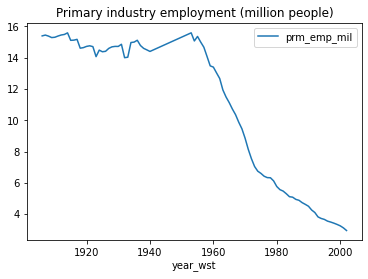

In [17]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'prm_emp_mil', ax = ax)
plt.title('Primary industry employment (million people)')
plt.show()

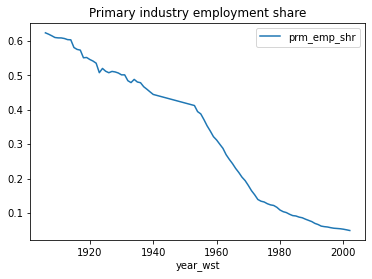

In [18]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'prm_emp_shr', ax = ax)
plt.title('Primary industry employment share')
plt.show()

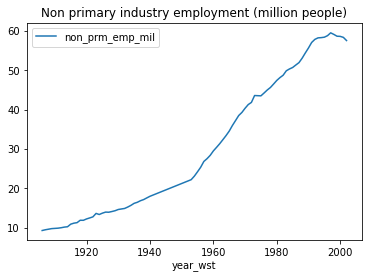

In [19]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'non_prm_emp_mil', ax = ax)
plt.title('Non primary industry employment (million people)')
plt.show()

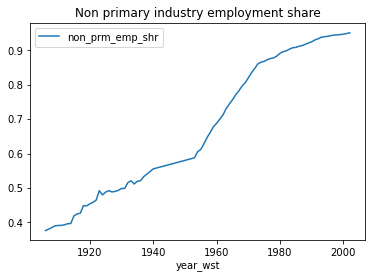

In [20]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'non_prm_emp_shr', ax = ax)
plt.title('Non primary industry employment share')
plt.show()

In [21]:
df_pre = df_emp_pre_picked
df_post = df_emp_post_picked

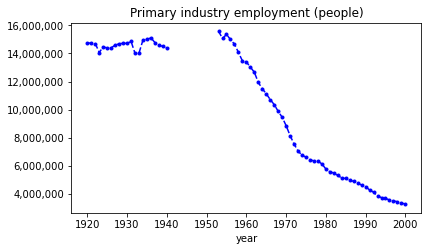

In [22]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'prm_emp', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'prm_emp',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry employment (people)')
plt.savefig('../../Notes/Facts/comb_prm_emp.pdf')
plt.show()

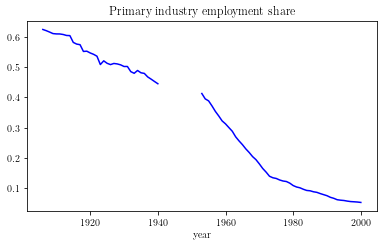

In [24]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1906].plot(x = 'year_wst', y = 'prm_emp_shr', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'prm_emp_shr',
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry employment share')
plt.savefig('../../Notes/Introduction/prm_emp_shr.pgf')
#plt.savefig('../../Graphs/pdf/prm_emp_shr.pdf')
plt.show()

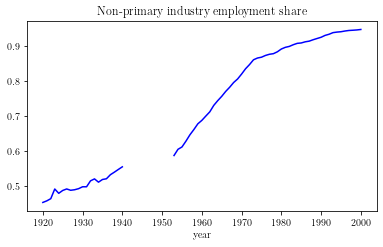

In [27]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'non_prm_emp_shr', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'non_prm_emp_shr',  
               #marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry employment share')
plt.savefig('../../Notes/Facts/comb_non_prm_emp_shr.pgf')
plt.show()

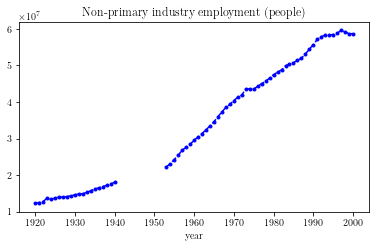

In [28]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'non_prm_emp', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 2000].plot(x = 'year_wst', y = 'non_prm_emp',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry employment (people)')
plt.savefig('../../Notes/Facts/comb_non_prm_emp.pdf')
plt.show()

In [29]:
df_post

,year_wst,prm_emp,non_prm_emp,prm_emp_shr,non_prm_emp_shr
0,1953,15590000,22220000,0.412325,0.587675
1,1954,15070000,23120000,0.394606,0.605394
2,1955,15360000,24230000,0.387977,0.612023
3,1956,15000000,25390000,0.371379,0.628621
4,1957,14670000,26860000,0.353239,0.646761
5,1958,14080000,27560000,0.338136,0.661864
6,1959,13480000,28410000,0.321795,0.678205
7,1960,13400000,29540000,0.312063,0.687937
8,1961,13030000,30440000,0.299747,0.700253
9,1962,12670000,31370000,0.287693,0.712307


In [30]:
df_emp_pre

,year_wst,prm_emp,scn_emp,trt_emp,mil,non_prm_emp,tot_emp,prm_emp_shr,non_prm_emp_shr
0,1906,15394100,4047900,5486400,246900,9287400,24681500,0.623710,0.376290
1,1907,15447500,4067600,5557400,149400,9475600,24923100,0.619807,0.380193
2,1908,15381000,4193300,5582500,154700,9621100,25002100,0.615188,0.384812
3,1909,15287700,4299200,5610600,141200,9768600,25056300,0.610134,0.389866
4,1910,15307700,4262000,5697100,133300,9825800,25133500,0.609056,0.390944
5,1911,15385700,4303300,5704800,126200,9881900,25267600,0.608910,0.391090
6,1912,15451700,4362400,5759200,124900,9996700,25448400,0.607178,0.392822
7,1913,15486500,4496300,5768500,110200,10154600,25641100,0.603972,0.396028
8,1914,15588600,4438100,5915900,109200,10244800,25833400,0.603428,0.396572
9,1915,15111900,4845500,6165800,113100,10898200,26010100,0.581001,0.418999


In [32]:
#df_merged.to_csv('../../Data/Cleaned/comb_emp.csv', index = False)

In [37]:
df_post

,year_wst,prm_emp,non_prm_emp,prm_emp_shr,non_prm_emp_shr
0,1953,15590000,22220000,0.412325,0.587675
1,1954,15070000,23120000,0.394606,0.605394
2,1955,15360000,24230000,0.387977,0.612023
3,1956,15000000,25390000,0.371379,0.628621
4,1957,14670000,26860000,0.353239,0.646761
5,1958,14080000,27560000,0.338136,0.661864
6,1959,13480000,28410000,0.321795,0.678205
7,1960,13400000,29540000,0.312063,0.687937
8,1961,13030000,30440000,0.299747,0.700253
9,1962,12670000,31370000,0.287693,0.712307
